### Create a dataframe with 5 student name and marks in each subject English, Tamil, Science, Social & Maths
### use np.random.randint(1, 100) for marks

1. Find the Total, Average in seperate columns
2. Create a flag column when any of the subject mark is less than 35 marks the student is Fail
3. Rank the students based on total if passed in all subjects
4. Visualize the total - bar chart, average - line chart, % pass & fail - Pie chart

In [1]:
import numpy as np
import pandas as pd

In [2]:
marks_df = pd.DataFrame(np.random.randint(20, 100, 25).reshape(5, 5), columns=["Eng", "Tam", "Sci", "Soc", "Mat"])
marks_df

,Eng,Tam,Sci,Soc,Mat
0,44,88,49,98,36
1,49,72,33,50,49
2,34,38,81,31,94
3,77,66,97,57,85
4,55,75,82,47,41


In [3]:
# Add student name & re-index
marks_df["Name"] = ["Arun", "Dinesh", "Raj", "Nisha", "Patel"]
marks_df = marks_df[["Name", "Eng", "Tam", "Sci", "Soc", "Mat"]]

In [4]:
marks_df

,Name,Eng,Tam,Sci,Soc,Mat
0,Arun,44,88,49,98,36
1,Dinesh,49,72,33,50,49
2,Raj,34,38,81,31,94
3,Nisha,77,66,97,57,85
4,Patel,55,75,82,47,41


In [5]:
def pass_or_fail(x):
    if x[0] and x[1] and x[2] and x[3] and x[4]:
        return "Pass"
    else:
        return "Fail"

In [6]:
pass_or_fail_df = marks_df.iloc[0:, 1:] >= 35

In [7]:
pass_or_fail_df

,Eng,Tam,Sci,Soc,Mat
0,True,True,True,True,True
1,True,True,False,True,True
2,False,True,True,False,True
3,True,True,True,True,True
4,True,True,True,True,True


In [8]:
marks_df = marks_df.copy()

In [9]:
pass_or_fail_df.apply(pass_or_fail, axis=1)

0    Pass
1    Fail
2    Fail
3    Pass
4    Pass
dtype: object

In [10]:
marks_df["pass/fail"] = pass_or_fail_df.apply(pass_or_fail, axis=1)

In [11]:
marks_df["Total"] = marks_df.iloc[0:, 1:6].sum(axis=1)

In [12]:
marks_df["Average"] = marks_df.iloc[0:, 1:6].mean(axis=1)

In [13]:
marks_df

,Name,Eng,Tam,Sci,Soc,Mat,pass/fail,Total,Average
0,Arun,44,88,49,98,36,Pass,315,63.0
1,Dinesh,49,72,33,50,49,Fail,253,50.6
2,Raj,34,38,81,31,94,Fail,278,55.6
3,Nisha,77,66,97,57,85,Pass,382,76.4
4,Patel,55,75,82,47,41,Pass,300,60.0


In [14]:
import matplotlib.pyplot as plt

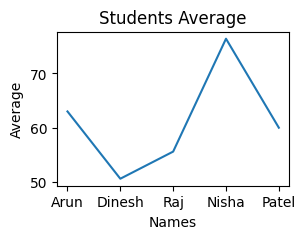

In [15]:
# Plot the student Average
plt.figure(figsize=(3,2))
plt.plot("Name", "Average", data=marks_df)
plt.title("Students Average")
plt.xlabel("Names")
plt.ylabel("Average")
plt.show()

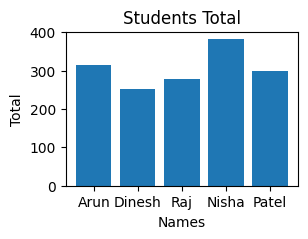

In [16]:
# Bar chart the total
plt.figure(figsize=(3,2))
plt.bar("Name", "Total", data=marks_df)
plt.title("Students Total")
plt.xlabel("Names")
plt.ylabel("Total")
plt.show()

In [17]:
# Pass fail % Pie chart
num_students =len(marks_df)
pass_percentage = len(marks_df.loc[marks_df["pass/fail"] == "Pass"])/num_students*100
fail_percentage = len(marks_df.loc[marks_df["pass/fail"] == "Fail"])/num_students*100

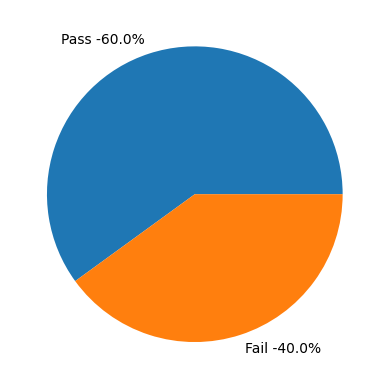

In [18]:
labels = [f"Pass -{pass_percentage}%", f"Fail -{fail_percentage}%"]
plt.pie([pass_percentage, fail_percentage], labels=labels)
plt.show()

In [19]:
## Rank the students
marks_df

,Name,Eng,Tam,Sci,Soc,Mat,pass/fail,Total,Average
0,Arun,44,88,49,98,36,Pass,315,63.0
1,Dinesh,49,72,33,50,49,Fail,253,50.6
2,Raj,34,38,81,31,94,Fail,278,55.6
3,Nisha,77,66,97,57,85,Pass,382,76.4
4,Patel,55,75,82,47,41,Pass,300,60.0


In [20]:
marks_df["Rank"] = marks_df["Total"].rank(ascending=False, method="first")

In [21]:
marks_df

,Name,Eng,Tam,Sci,Soc,Mat,pass/fail,Total,Average,Rank
0,Arun,44,88,49,98,36,Pass,315,63.0,2.0
1,Dinesh,49,72,33,50,49,Fail,253,50.6,5.0
2,Raj,34,38,81,31,94,Fail,278,55.6,4.0
3,Nisha,77,66,97,57,85,Pass,382,76.4,1.0
4,Patel,55,75,82,47,41,Pass,300,60.0,3.0
